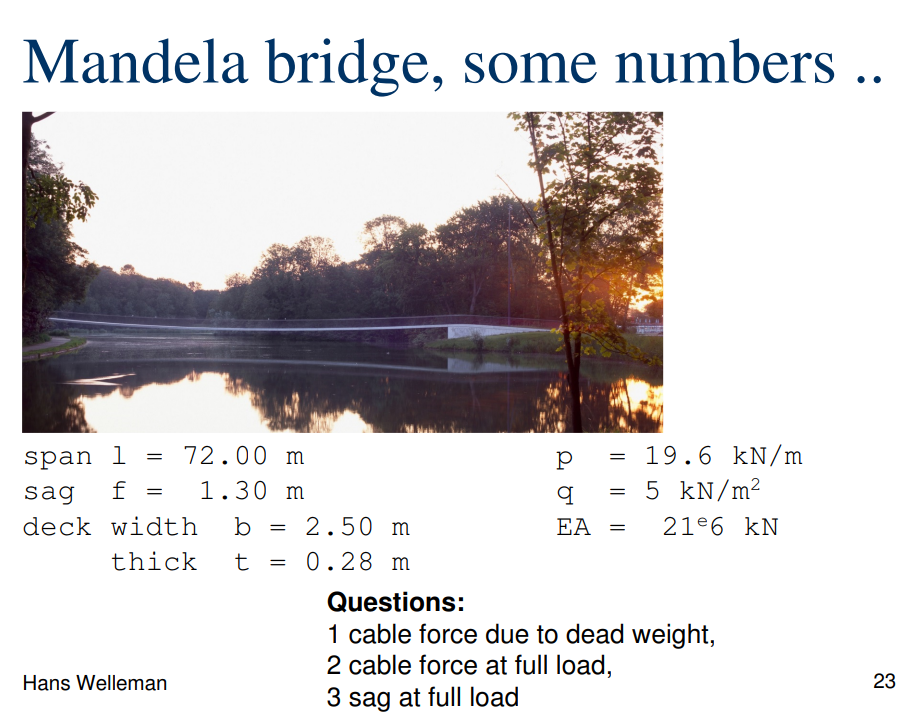
https://icozct.tudelft.nl/TUD_CT/CM5/collegestof/files/part4-cables-and-arches.pdf

In [1]:
import sympy as sp
w = sp.symbols('w', cls=sp.Function)
C1, C2 = sp.symbols('C1 C2')
x, H = sp.symbols('x H')

alpha = 1 #with axial deformation
AXexact = 1 #exact formulation of axial deformation
Ec = 30e3
Ac = 2500*280
EA = Ac*Ec/1000 #kN
L = 72
f = 1.3
q = sp.nsimplify(2.5*28*0.28) #nsimplify to get rid of floats (difficult for integration)

diffeq = sp.Eq(-H*sp.diff(w(x),x,2),q)
display(diffeq)

w = sp.dsolve(diffeq)
w = w.rhs

eq1  = sp.Eq(w.subs(x , 0) , 0)
eq2  = sp.Eq(w.subs(x , L) , 0)

sol = sp.solve((eq1 , eq2) ,
               (C1  , C2))
w_sol = w.subs(sol)
display(w_sol)

dL = sp.integrate((1+sp.diff(w_sol,x)**2),(x,0,L))*alpha*H/EA
eq3 = sp.Eq(w_sol.subs(x,L/2),f)

H_sol = sp.solve(eq3,H)[0]
print("H=",H_sol,"kN")
w_sol2 = w_sol.subs(H,H_sol)

LL = sp.integrate(sp.nsimplify(sp.sqrt(1+sp.diff(w_sol2,x)**2)),(x,0,L))-dL.subs(H,H_sol) #nsimplify to get rid of floats (difficult for integration)
print("LL=",sp.N(LL),'m')



Eq(-H*Derivative(w(x), (x, 2)), 98/5)

-49*x**2/(5*H) + 3528*x/(5*H)

H= 9769.84615384615 kN
LL= 72.0289888552996 m


Caternary model

In [4]:
%reset -f
import sympy as sp
w = sp.symbols('w', cls=sp.Function)
C1, C2 = sp.symbols('C1 C2')
x, H = sp.symbols('x H')

alpha = 1 # with axial deformation
AXexact = 1 #exact formulation of axial deformation
Ec = 30e3
Ac = 2500*280
EA = Ac*Ec/1000 #kN
L = 72
f = 1.3
#H = 10000
q = sp.nsimplify(32.1)

diffeq = sp.Eq(-H*sp.diff(w(x),x,2),q*sp.sqrt(1+sp.diff(w(x),x)**2))

w = sp.dsolve(diffeq) #faster than Maple
w = w.rhs
display(w)

eq1  = sp.Eq(w.subs(x , 0) , 0)
eq2  = sp.Eq(w.subs(x , L) , 0)
sol = sp.nonlinsolve((eq1 , eq2) ,
                     (C1  , C2)) #other solver, slower than Maple but in totality faster
print("Many complex solutions are found and for the only real solution the assumption that H is real is not taken into account:")
display(sol)
C1_sol = sol.args[0][0] #get non-complex answer from set of answers
C2_sol = sol.args[0][1]
w_sol = w.subs([(C1,C1_sol),(C2,C2_sol)])
print("The function for w is:")
display(w_sol)

dL = sp.integrate((1+sp.diff(w_sol,x)**2),(x,0,L))*alpha*H/EA
eq3 = sp.Eq(sp.integrate(sp.nsimplify(sp.sqrt(1+sp.diff(w_sol,x)**2)),(x,0,L))-dL,72.02898885)
H_sol = sp.nsolve(eq3,H,10000) #algebraic answer cannot be find, in Maple neither, numerical solver is used
display(w_sol.subs(H,H_sol))
print("H =",H_sol,"kN")

C1 - 10*H*cosh(C2 - 321*x/(10*H))/321

Many complex solutions are found and for the only real solution the assumption that H is real is not taken into account:


{(10*H*cosh(I*(2*_n*pi + arg(sqrt(exp(11556/(5*H))))) + log(Abs(sqrt(exp(11556/(5*H))))))/321, ImageSet(Lambda(_n, I*(2*_n*pi + arg(sqrt(exp(11556/(5*H))))) + log(Abs(sqrt(exp(11556/(5*H)))))), Integers)), (10*H*cosh(I*(2*_n*pi + arg(-sqrt(exp(11556/(5*H))))) + log(Abs(sqrt(exp(11556/(5*H))))))/321, ImageSet(Lambda(_n, I*(2*_n*pi + arg(-sqrt(exp(11556/(5*H))))) + log(Abs(sqrt(exp(11556/(5*H)))))), Integers)), (10*H*cosh(I*(2*_n*pi + arg(sqrt(exp(11556/(5*H))))) + log(Abs(sqrt(exp(11556/(5*H))))))/321, ImageSet(Lambda(_n, I*(2*_n*pi + arg(sqrt(exp(11556/(5*H))))) + log(Abs(sqrt(exp(11556/(5*H)))))), Integers)), (10*H*cosh(I*(2*_n*pi + arg(-sqrt(exp(11556/(5*H))))) + log(Abs(sqrt(exp(11556/(5*H))))))/321, ImageSet(Lambda(_n, I*(2*_n*pi + arg(-sqrt(exp(11556/(5*H))))) + log(Abs(sqrt(exp(11556/(5*H)))))), Integers)), (10*H*cosh(log(-sqrt(exp(11556/(5*H)))))/321, log(-sqrt(exp(11556/(5*H))))), (10*H*cosh(log(sqrt(exp(11556/(5*H)))))/321, log(sqrt(exp(11556/(5*H)))))}

The function for w is:


-10*H*cosh(log(sqrt(exp(11556/(5*H)))) - 321*x/(10*H))/321 + 10*H*cosh(log(sqrt(exp(11556/(5*H)))))/321

447.514628963519 - 446.061124564331*cosh(0.00224184522015162*x - 0.0807064279254582)

H = 14318.5620985150 kN
